<p align="center" ><img src="https://www.ai4kids.ai/wp-content/uploads/2019/07/ai4kids_website_logo_120x40.png"></img></p>

# 學AI真簡單 <1> 初探機器學習
## 第三章 動手實作監督式學習 
### 3-3 乳癌預測 分類器介紹與應用



<p align="right">© Copyright AI4kids.ai</p>

1. 載入所需套件

In [ ]:
#舉例：三年一班 每個同學的國英數成績，三個科目分別都考了三次試，個別有三筆成績
class_grade = { '賴淪落':[[30, 40, 50], 
                         [100, 90, 70], 
                         [100, 60, 40]],
                '賴萍萍':[[60, 60, 40], 
                         [100, 50, 70], 
                         [10, 60, 50]],
                '許天選':[[80, 70, 50], 
                         [70, 80, 70], 
                         [100, 20, 40]],
                '許禎禎':[[50, 70, 50], 
                         [80, 90, 70], 
                         [100, 50, 40]],
                '鄭間人':[[70, 90, 80], 
                         [10, 80, 70], 
                         [100, 30, 70]],
                '鄭心心':[[40, 40, 50], 
                         [80, 30, 80], 
                         [90, 60, 80]],
               }

print("許天選的所有成績:  ",class_grade['許天選'])
print("賴淪落的所有的國文成績:  ",class_grade['賴淪落'][0])
print("鄭間人的第一次數學成績:  ",class_grade['鄭間人'][2][0])

許天選的所有成績:   [[80, 70, 50], [70, 80, 70], [100, 20, 40]]
賴淪落的所有的國文成績:   [30, 40, 50]
鄭間人的第一次數學成績:   100


In [ ]:
# 從 sklearn 載入 breast_cancer 乳癌資料集
from sklearn.datasets import load_breast_cancer   

# 載入我們會用到的模型，KNN分類模型
from sklearn.neighbors import KNeighborsClassifier

# 載入切分資料集成訓練集及測試集的套件，train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
#是主要用於資料處理上,支援非常多的科學計算，包含矩陣運算、線性代數、傅立葉轉換等。
import numpy as np        
#提供特殊資料結構，具有數據處理和資料分析的功能
import pandas as pd 
#資料視覺化,可以畫出各種圖型如長條圖、分佈圖、立體圖等        
import matplotlib.pyplot as plt  
#豐富的視覺化資料庫，包括時間序列、聯合分佈圖(jointplots)和小提琴圖(violin diagrams)。
import seaborn as sns       
 

## 2. 載入資料集，觀察資料集

In [ ]:
# 載入資料集，放到 my_data變數內
my_data = load_breast_cancer()

# 可以把 my_data 給印出來，看一下裡面的內容
print(my_data)


# 更多關於此資料集的敘述可以到官網瀏覽
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# 印出來後可知他有幾個 key name有："data","target","target_names","DESCR","filename" ...等
# 直接觀察有哪些 key 在資料集內
print(my_data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
dic = {'apple':'蘋果', 'banana':'香蕉'}
print(dic['apple'])

蘋果


data：特徵實際數據

target：目標值數據

target_names：分類名稱：分別是惡性腫瘤及良性腫瘤（'malignant' 'benign'）
        惡性為1，良性為0

feature_names：各種特征的名稱

In [ ]:
# 觀察資料筆數
print("資料筆數:")
print(my_data.data.shape)
print("\n")

# 觀察我們第一筆的資料內容
print("第一筆的資料內容:")
print(my_data.data[0])
print("\n")

# 觀察我們第一筆的分類目標
print("第一筆的標籤label:")
print(my_data.target[0])
print("\n")

# 觀察我們要預測目標的名稱種類
print("預測目標的名稱種類，分別是惡性腫瘤[0]及良性腫瘤[1]:")
print(my_data.target_names)
print("\n")

資料筆數:
(569, 30)


第一筆的資料內容:
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


第一筆的標籤label:
0


預測目標的名稱種類，分別是惡性腫瘤[0]及良性腫瘤[1]:
['malignant' 'benign']




# 轉換成 DataFrame 格式

In [ ]:
#把每個人的特徵資料轉成DataFrame
df = pd.DataFrame(my_data.data, columns = my_data.feature_names)
#將每個人的標籤加入這個DataFrame
df['target'] = my_data.target

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
#顯示資料的狀態與資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 查看某一個特徵值或target內有哪些『種類』資料

In [ ]:
#查看某一個特徵值或target內有哪些『種類』資料
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

# 看看是否有缺失值

In [ ]:
#是否有缺失值
df.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#是否有缺失值
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# 3. 切分資料集 - 訓練集 / 測試集

In [ ]:
# 我們將資料切分成兩組，把80%當成訓練集，20%當成測試集
# (train_x, train_y) 為80%的訓練集，用來訓練模型
# (test_x , test_y ) 為20%的測試集，用來驗證模型的預測能力

X_train = df.drop(['target'], axis=1)
Y_train = df['target'] 

train_x, test_x, train_y, test_y = train_test_split(
    my_data.data, my_data.target, test_size= 0.2, random_state=1001, shuffle=True)

# 可以看一下這些資料集的維度，驗證沒有切錯
print("原始資料集的維度大小:" ,my_data.data.shape)
print("訓練集的維度大小:   " ,train_x.shape)
print("測試集的維度大小:   " ,test_x.shape)

原始資料集的維度大小: (569, 30)
訓練集的維度大小:    (455, 30)
測試集的維度大小:    (114, 30)


# 4. 訓練模型及驗證模型 ,K值用預設數

In [ ]:
# 把預先載入好的套件KNN分類器拿出來使用，並且存到變數my_model中
my_model = KNeighborsClassifier()

# 訓練模型，放入要訓練的訓練集(train_x, train_y)
#在這一步，已經將my_model訓練完畢
my_model.fit(train_x, train_y)

#pred_y = my_model.predict(test_x)
#score = sk.score(pred_y, test_y)   #注意每個套件的ｓｃｏｒｅ函式功能不同！

# 訓練完模型後，我們就可以用 my_model.score 來評估模型的能力
#在這一步，將test_x放入訓練完的my_model，然後預測出pred_y，再將pred_y和test_y做比較，然後得出準確度test_score
test_score = my_model.score(test_x, test_y)

print("模型評估完測試集的準確度為: ", test_score)

模型評估完測試集的準確度為:  0.9035087719298246


*KNeighborsClassifier*.score() -> 正確率百分比





# 視覺化觀察


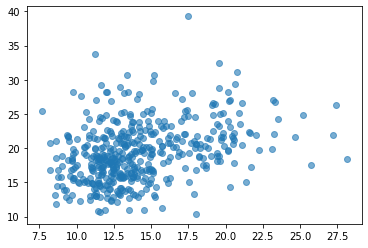

In [ ]:
plt.scatter(train_x[:,0],train_x[:,1],alpha=0.6)

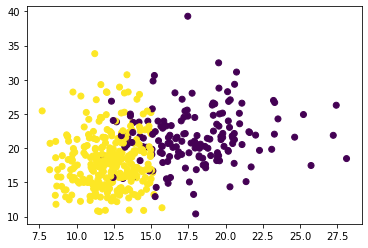

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_x[:,0],train_x[:,1],c = my_model.predict(train_x))

#可以從圖中(x軸)發現，特徵0可以分出好的一條分割線，來分出良性腫瘤與惡性腫瘤
#但從y軸，畫平行線，無法分割兩個顏色，代表關聯性不是很強

# Q：：調整參數K值 (n_neighbors) ，觀察看看有什麼變化？

In [ ]:
# 先看看預設的參數是什麼
print(my_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


# KNN 對每一個點，匡出最近的K個點，然後由那K個點投票，投票出目前這個點該分成哪一類。
# 要注意：K盡量不要是偶數，因為會有投票平手的問題。
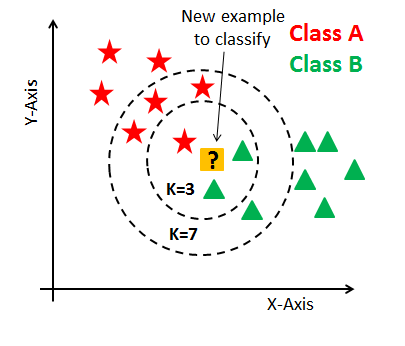

In [ ]:
# K值改273 (原本k=5,準確度0.9035087719298246 ) 
my_model = KNeighborsClassifier(n_neighbors=273)

# 訓練模型，放入要訓練的訓練集(train_x, train_y)
my_model.fit(train_x, train_y)

# 訓練完模型後，我們就可以用 my_model.score 來評估模型的能力
test_score = my_model.score(test_x, test_y)
print("模型評估完測試集的準確度為: ", test_score)

模型評估完測試集的準確度為:  0.7807017543859649


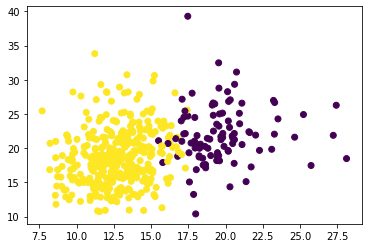

In [ ]:
plt.scatter(train_x[:,0],train_x[:,1],c=my_model.predict(train_x))

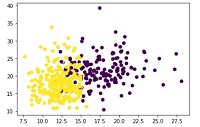

## Q：要如何快速的找到最佳K值？ 



# 分析特徵值

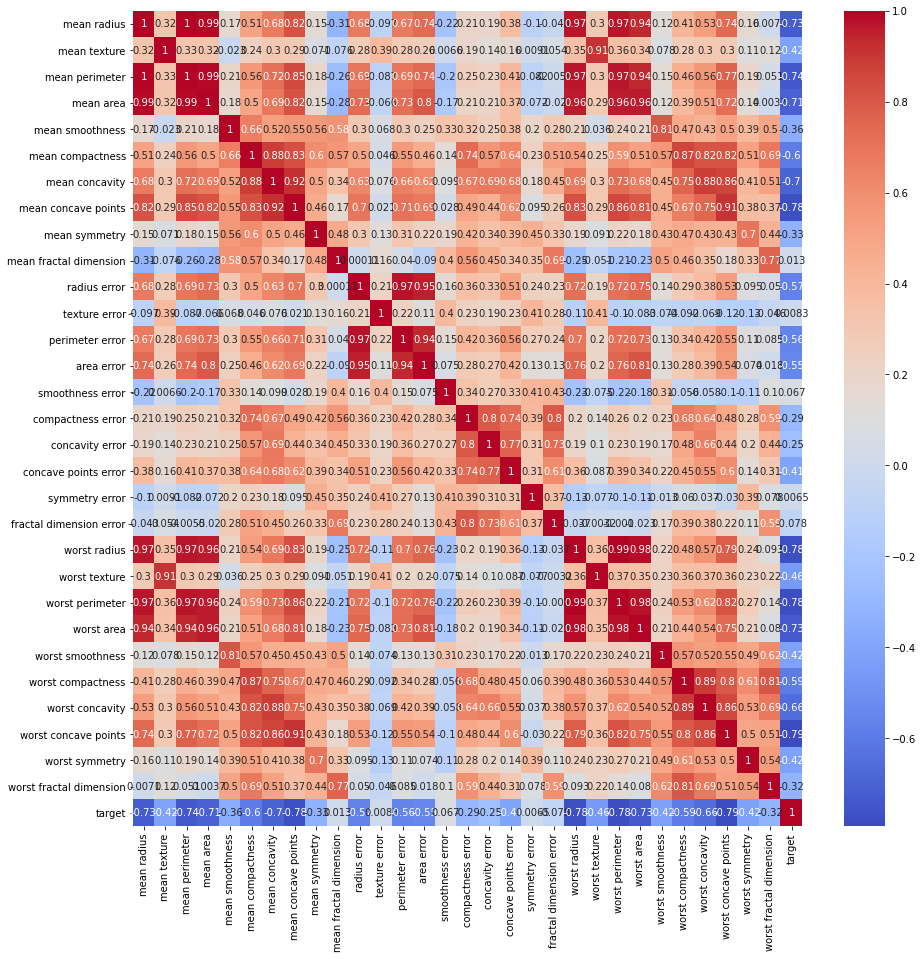

In [ ]:
#設定畫布大小
plt.figure(figsize=(15, 15))
#相關矩陣
correlation= df.corr()
#熱力圖
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [ ]:

correlation = df.corr()
print(correlation)

                         mean radius  ...    target
mean radius                 1.000000  ... -0.730029
mean texture                0.323782  ... -0.415185
mean perimeter              0.997855  ... -0.742636
mean area                   0.987357  ... -0.708984
mean smoothness             0.170581  ... -0.358560
mean compactness            0.506124  ... -0.596534
mean concavity              0.676764  ... -0.696360
mean concave points         0.822529  ... -0.776614
mean symmetry               0.147741  ... -0.330499
mean fractal dimension     -0.311631  ...  0.012838
radius error                0.679090  ... -0.567134
texture error              -0.097317  ...  0.008303
perimeter error             0.674172  ... -0.556141
area error                  0.735864  ... -0.548236
smoothness error           -0.222600  ...  0.067016
compactness error           0.206000  ... -0.292999
concavity error             0.194204  ... -0.253730
concave points error        0.376169  ... -0.408042
symmetry err

In [ ]:
#這個dataframe中的欄位名稱
correlation.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
#自動化，選出與target關聯性大於0.5的特徵
result = []
for i in range(len(correlation["target"])):
  if abs(correlation["target"][i]) > 0.5:
      result.append(correlation.columns[i])

print(result)

['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points', 'target']


In [ ]:
NUM_POINTS = 29
features_mean= list(df.columns[18:NUM_POINTS+1])
print(features_mean)


['symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


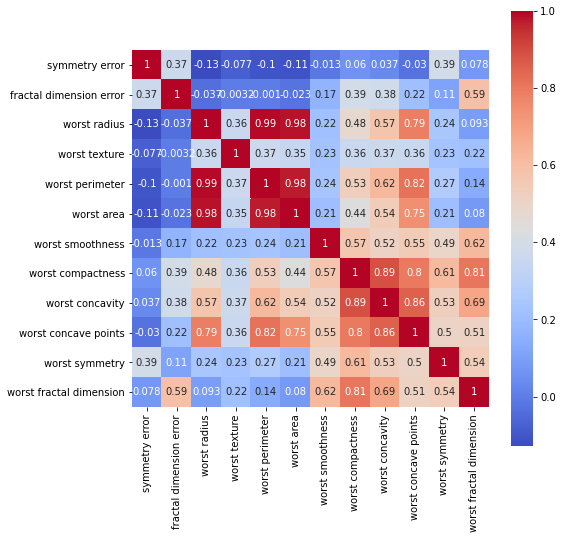

In [ ]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')

我們有30個定義數據的屬性/特征，然而並非所有這些都是對我們的分類問題有用的。

由相關性(Correlationzp)分析，可以用來消除不重要的屬性。

如果2個要素高度相關，則它們傳達相同的信息。因此，可以刪除其中之一。

## Q 減少部分特徵值(去除多餘的特徵值)，準確度有什麼變化？